# MLP neural networks 

A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). The term MLP is used ambiguously, sometimes loosely to refer to any feedforward ANN, sometimes strictly to refer to networks composed of multiple layers of perceptrons (with threshold activation); see § Terminology. Multilayer perceptrons are sometimes referred to as "vanilla" neural networks, especially when they have a single hidden layer.

An MLP consists of at least three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training.Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

In [68]:
#import relevant modules 
#import relevant libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sn
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline



In [3]:
#read in the dataset 
dataset = pd.read_csv('framingham.csv')

In [4]:
import preprocessing_ml as pp

Importing the preprocessing module for the Exeter NatSci Machine Learning Group.....
Successfully imported the preprocessing module


In [5]:
def Multilayer(X_train,  X_test, y_train, y_test, v=0):
    '''Do support vector mechanism fitting and print information about the success of the fitting
    - X_train: Dataframe x training set
    - y_train: Dataframe y training set
    - X_test: Dataframe x test set
    - y_test: Dataframe y test set
    - v (optional, default = 0): int (0 or 1) verbose
    '''
    
    from sklearn.neural_network import MLPClassifier
    
    MLP = MLPClassifier(random_state=0)
    
    MLP.fit(X_train, y_train) 
    
    if v == 1:
        print('running multilayer perceptrons')
    
    return MLP
    
    
    

In [6]:
#apply all functions to model 

dataset_t = pp.chose_features(dataset, n_features=14) #try all columns
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
dataset_t = pp.scale_data(dataset_t, 'minmax', v=1)
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset

MLP = Multilayer(X_train, X_test, y_train, y_test, v=1)
y_pred = MLP.predict(X_test)




Scaling data....
	 * Using minmax scaling
running multilayer perceptrons


In [7]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.83606557377


Alternating parameters for MLP

In [8]:
#number of features 
features = dataset.columns #try all columns
acc=[]
for i in range (3, 16 ):
    
    dataset_t = pp.chose_features(dataset, n_features=i) # choose n features
    dataset_t = pp.drop_missing(dataset_t) # drop missing rows
    X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset
    MLP= Multilayer(X_train, X_test, y_train, y_test)   
    
    y_pred = MLP.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    acc.append(accuracy*100)
print(acc)



[83.268482490272376, 84.655396618985705, 82.068062827225134, 82.329842931937165, 82.068062827225134, 81.937172774869111, 84.748010610079575, 84.748010610079575, 85.086551264980031, 77.762982689747005, 83.879781420765028, 82.786885245901644, 83.060109289617486]


Can see that 11 features gives highest accuracy, so this will be used from now onwards, using default parameters 

In [11]:
#comparison between unscaled and scaled data 

dataset_t1 = pp.chose_features(dataset, n_features=11) #try all columns
dataset_t1 = pp.drop_missing(dataset_t1) # drop missing rows
X_train, X_test, y_train, y_test = pp.split_data(dataset_t1) # split dataset
MLP = Multilayer(X_train, X_test, y_train, y_test, v=1)
y_pred = MLP.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Unscaled data accuracy is:', accuracy)


dataset_t2 = pp.chose_features(dataset, n_features=11) #try all columns
dataset_t2 = pp.drop_missing(dataset_t2) # drop missing rows
dataset_t2 = pp.scale_data(dataset_t2, 'minmax', v=1 )
X_train, X_test, y_train, y_test = pp.split_data(dataset_t2) # split dataset
MLP = Multilayer(X_train, X_test, y_train, y_test, v=1)
y_pred = MLP.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Scaled data (using MinMax) accuracy is:', accuracy)

#comparison between unscaled and scaled data 

dataset_t3 = pp.chose_features(dataset, n_features=11) #try all columns
dataset_t3 = pp.drop_missing(dataset_t3) # drop missing rows
dataset_t3 = pp.scale_data(dataset_t3, 'standard', v=1 )
X_train, X_test, y_train, y_test = pp.split_data(dataset_t3) # split dataset
MLP = Multilayer(X_train, X_test, y_train, y_test, v=1)
y_pred = MLP.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Scaled data (using standard) accuracy is:', accuracy)


running multilayer perceptrons
Unscaled data accuracy is: 0.85086551265
Scaling data....
	 * Using minmax scaling
running multilayer perceptrons
Scaled data (using MinMax) accuracy is: 0.837549933422
Scaling data....
	 * Using standard scaling
running multilayer perceptrons
Scaled data (using standard) accuracy is: 0.849533954727


Interestingly again unscaled data results in greatest accruracy, when using default settings with 11 fearures 

Comparison between unscaled and scaled for differeing feature numbers 

In [12]:
#number of features 
features = dataset.columns #try all columns
acc2=[]
for i in range (3, 16 ):
    
    dataset_s = pp.chose_features(dataset, n_features=i) # choose n features
    dataset_s = pp.drop_missing(dataset_s) # drop missing rows
    dataset_s = pp.scale_data(dataset_s, 'standard', v=1)
    X_train, X_test, y_train, y_test = pp.split_data(dataset_s) # split dataset
    MLP= Multilayer(X_train, X_test, y_train, y_test)   
    
    y_pred = MLP.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    acc2.append(accuracy*100)
print(acc2)

Scaling data....
	 * Using standard scaling
Scaling data....
	 * Using standard scaling
Scaling data....
	 * Using standard scaling
Scaling data....
	 * Using standard scaling
Scaling data....
	 * Using standard scaling
Scaling data....
	 * Using standard scaling
Scaling data....
	 * Using standard scaling
Scaling data....
	 * Using standard scaling
Scaling data....
	 * Using standard scaling
Scaling data....
	 * Using standard scaling
Scaling data....
	 * Using standard scaling
Scaling data....
	 * Using standard scaling


/Users/eleanorbarr/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Scaling data....
	 * Using standard scaling
[83.916990920881972, 84.135240572171654, 82.722513089005233, 82.460732984293202, 82.591623036649224, 82.329842931937165, 83.952254641909818, 84.482758620689651, 84.953395472703065, 85.086551264980031, 82.786885245901644, 83.469945355191257, 83.333333333333343]


<Figure size 864x432 with 0 Axes>

Text(0.5,1,'Comparison between scaled and unscaled data for MLP with ranging feature numbers')

Text(0.5,0,'Feature number')

Text(0,0.5,'Accuracy')

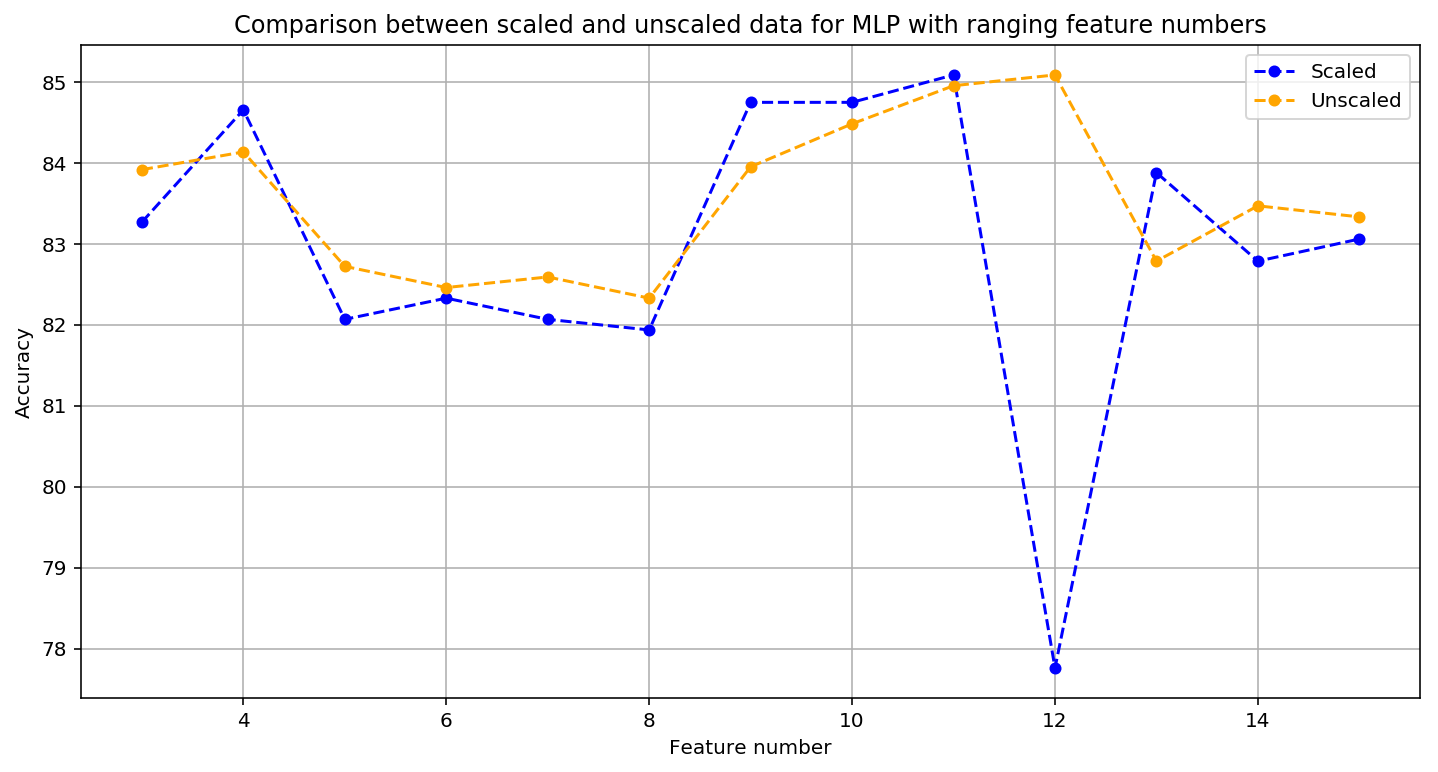

In [151]:
plt.figure(figsize=(12,6))
plt.plot(range(3,16), acc, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5 )
plt.plot(range(3,16), acc2, color='orange', linestyle='dashed', marker='o',
         markerfacecolor='orange', markersize=5)
plt.title('Comparison between scaled and unscaled data for MLP with ranging feature numbers')
plt.xlabel('Feature number')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(['Scaled', 'Unscaled'])

In [199]:
def Multilayer(X_train,  X_test, y_train, y_test, v=0, hidden_layer_sizes=(100,)):
    '''Do support vector mechanism fitting and print information about the success of the fitting
    - X_train: Dataframe x training set
    - y_train: Dataframe y training set
    - X_test: Dataframe x test set
    - y_test: Dataframe y test set
    - v (optional, default = 0): int (0 or 1) verbose
    '''
    
    from sklearn.neural_network import MLPClassifier
    
    MLP = MLPClassifier( hidden_layer_sizes, random_state=0)
    
    MLP.fit(X_train, y_train) 
    
    if v == 1:
        print('running multilayer perceptrons')
    
    return MLP
    

In [200]:
dataset_t = pp.chose_features(dataset, n_features=12) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
dataset_t = pp.scale_data(dataset_t, 'standard', v=1)
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset

acc4=[]
for i in range(1, 100):
    MLP= Multilayer(X_train, X_test, y_train, y_test, hidden_layer_sizes=(100, i))      
    y_pred = MLP.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc4.append(accuracy*100)


print(acc4)

Scaling data....
	 * Using standard scaling
[84.820239680426099, 84.553928095872166, 84.154460719041282, 84.553928095872166, 84.820239680426099, 84.687083888149147, 84.820239680426099, 84.4207723035952, 84.553928095872166, 84.553928095872166, 84.021304926764316, 84.687083888149147, 84.553928095872166, 84.687083888149147, 84.4207723035952, 84.953395472703065, 84.953395472703065, 84.953395472703065, 85.352862849533949, 84.953395472703065, 84.021304926764316, 84.953395472703065, 84.820239680426099, 84.953395472703065, 84.820239680426099, 84.953395472703065, 84.687083888149147, 85.086551264980031, 82.689747003994668, 85.219707057256983, 84.4207723035952, 84.4207723035952, 84.820239680426099, 84.820239680426099, 84.021304926764316, 84.4207723035952, 84.820239680426099, 84.687083888149147, 84.820239680426099, 84.820239680426099, 85.219707057256983, 84.953395472703065, 84.553928095872166, 84.820239680426099, 84.154460719041282, 84.553928095872166, 85.086551264980031, 84.687083888149147, 84.15

<Figure size 864x432 with 0 Axes>

Text(0.5,1,'Ranging hidden layer numbers and the effect on accuracy ')

Text(0.5,0,'Hidden layers ')

Text(0,0.5,'Accuracy')

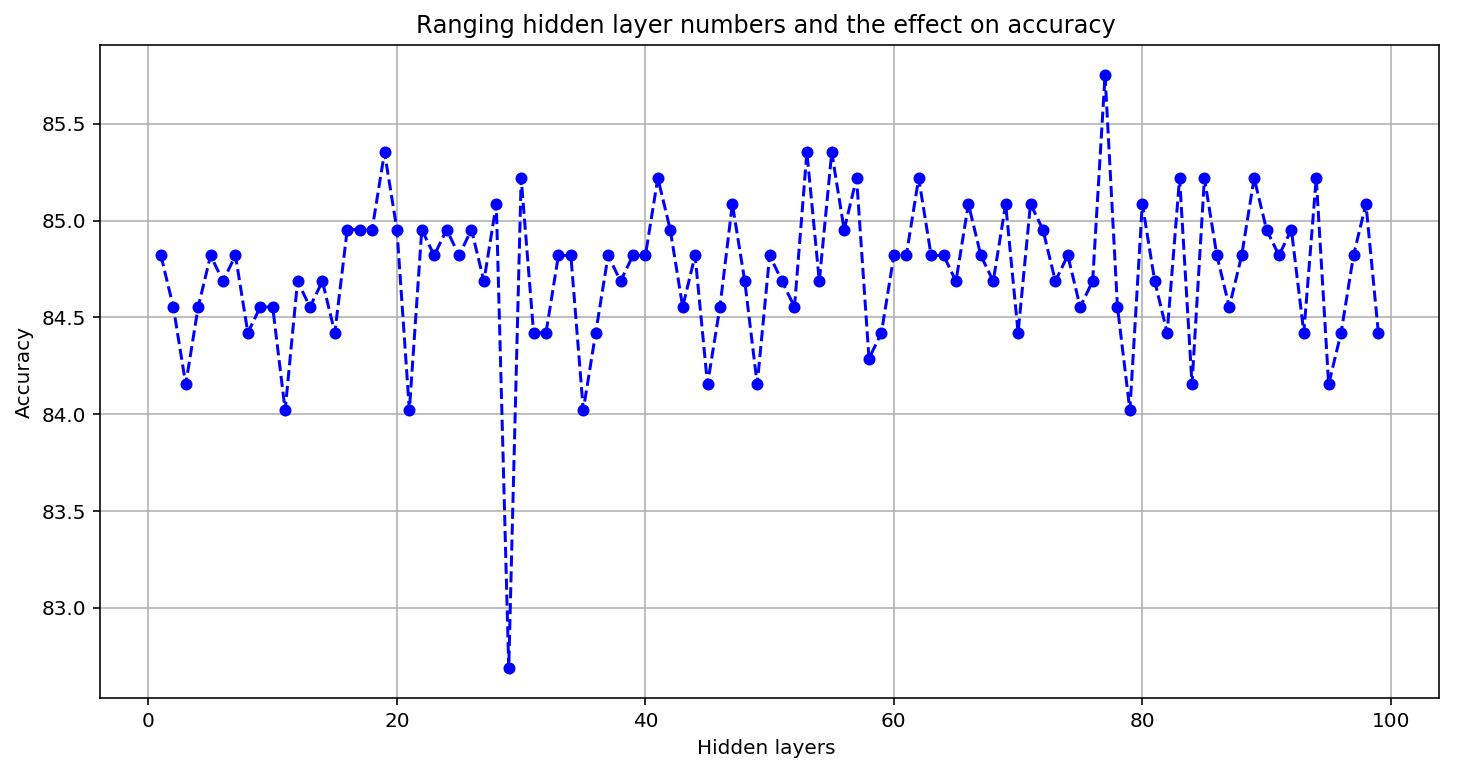

In [172]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), acc4, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)

plt.title('Ranging hidden layer numbers and the effect on accuracy ')
plt.grid()
plt.xlabel('Hidden layers ')
plt.ylabel('Accuracy')

In [173]:
dataset_t = pp.chose_features(dataset, n_features=12) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
dataset_t = pp.scale_data(dataset_t, 'standard', v=1)
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset

acc5=[]
for i in range(1, 100):
    MLP= Multilayer(X_train, X_test, y_train, y_test, hidden_layer_sizes=(i,))      
    y_pred = MLP.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc5.append(accuracy*100)


print(acc5)

Scaling data....
	 * Using standard scaling
[84.953395472703065, 84.953395472703065, 84.287616511318248, 84.553928095872166, 84.553928095872166, 84.553928095872166, 84.154460719041282, 84.820239680426099, 84.287616511318248, 84.953395472703065, 84.687083888149147, 85.086551264980031, 84.687083888149147, 84.820239680426099, 83.754993342210383, 84.687083888149147, 84.553928095872166, 84.820239680426099, 84.4207723035952, 84.953395472703065, 84.4207723035952, 84.820239680426099, 84.553928095872166, 84.553928095872166, 84.953395472703065, 84.154460719041282, 84.820239680426099, 84.154460719041282, 85.352862849533949, 84.687083888149147, 84.687083888149147, 84.687083888149147, 85.619174434087881, 85.352862849533949, 84.154460719041282, 84.820239680426099, 85.086551264980031, 84.687083888149147, 84.154460719041282, 84.553928095872166, 83.621837549933417, 84.953395472703065, 84.4207723035952, 84.820239680426099, 84.820239680426099, 84.287616511318248, 84.820239680426099, 85.352862849533949, 8

<Figure size 864x432 with 0 Axes>

Text(0.5,1,'Ranging hidden layer numbers and the effect on accuracy ')

Text(0.5,0,'Hidden layers ')

Text(0,0.5,'Accuracy')

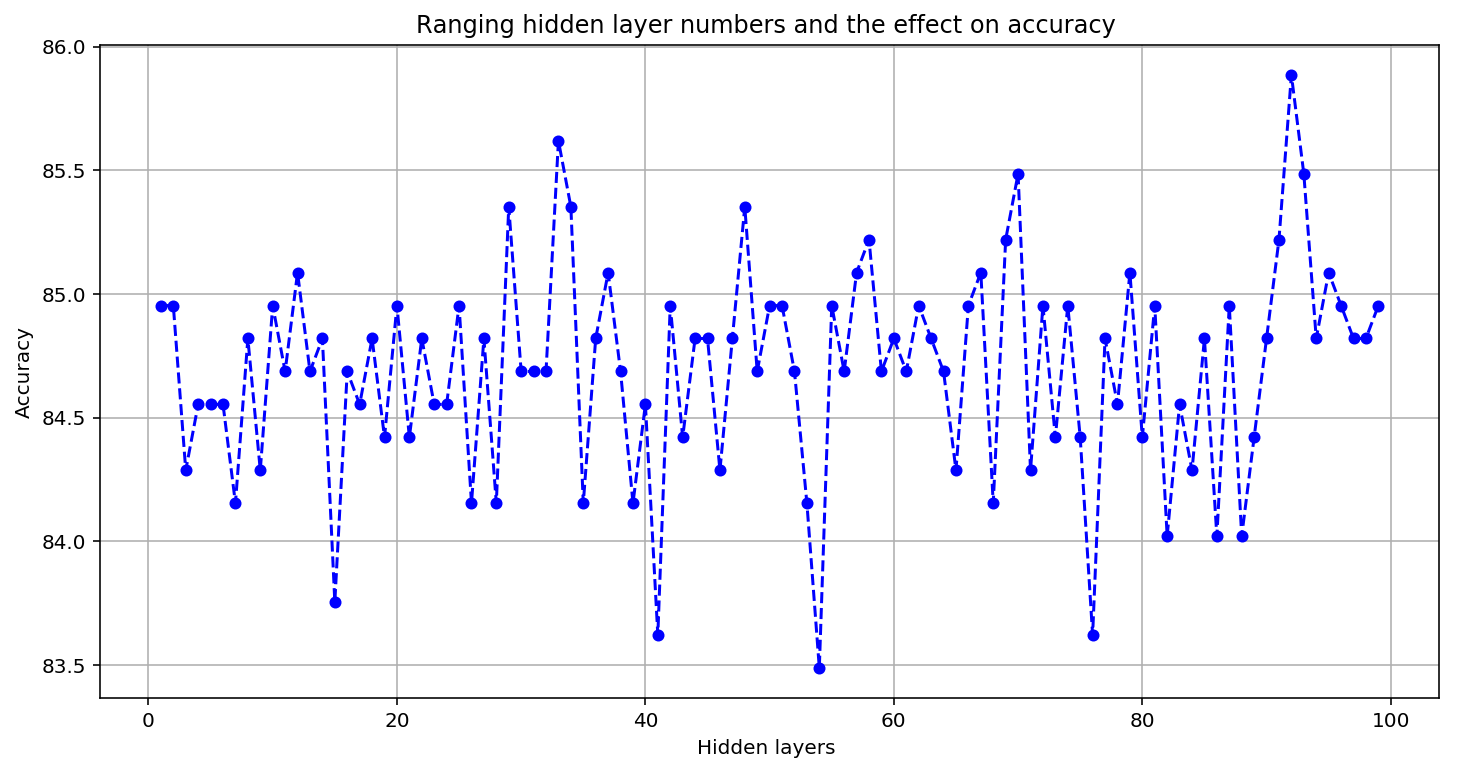

In [174]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), acc5, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)

plt.title('Ranging hidden layer numbers and the effect on accuracy ')
plt.grid()
plt.xlabel('Hidden layers ')
plt.ylabel('Accuracy')

# Ranging value of alpha - to prevent bias 

In [98]:
def Multilayer(X_train,  X_test, y_train, y_test, v=0, hidden_layer_sizes=(100,), activation ='identity', solver='lbfgs', alpha =0.001, random_state=0):
    '''Do support vector mechanism fitting and print information about the success of the fitting
    - X_train: Dataframe x training set
    - y_train: Dataframe y training set
    - X_test: Dataframe x test set
    - y_test: Dataframe y test set
    - v (optional, default = 0): int (0 or 1) verbose
    '''
    
    from sklearn.neural_network import MLPClassifier
    
    MLP = MLPClassifier(hidden_layer_sizes, activation, solver,  alpha,  random_state)
    
    MLP.fit(X_train, y_train) 
    
    if v == 1:
        print('running multilayer perceptrons')
    
    return MLP
    

In [99]:
dataset_t = pp.chose_features(dataset, n_features=12) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
dataset_t = pp.scale_data(dataset_t, 'standard', v=1)
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset

alphas = np.logspace(-10, 10, 20)

acc6=[]
for i in alphas:
    MLP= Multilayer(X_train, X_test, y_train, y_test, hidden_layer_sizes=(100,), activation='identity', solver='lbfgs', alpha=i)      
    y_pred = MLP.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc6.append(accuracy*100)


print(acc6)

Scaling data....
	 * Using standard scaling
[85.086551264980031, 85.086551264980031, 85.086551264980031, 85.086551264980031, 85.219707057256983, 85.086551264980031, 85.219707057256983, 85.086551264980031, 85.086551264980031, 85.219707057256983, 85.219707057256983, 85.219707057256983, 84.820239680426099, 84.820239680426099, 84.820239680426099, 84.820239680426099, 84.820239680426099, 84.820239680426099, 84.820239680426099, 84.820239680426099]


<Figure size 864x432 with 0 Axes>

Text(0.5,1,'Ranginge value of alpha ')

Text(0.5,0,'value of alpha')

Text(0,0.5,'Accuracy')

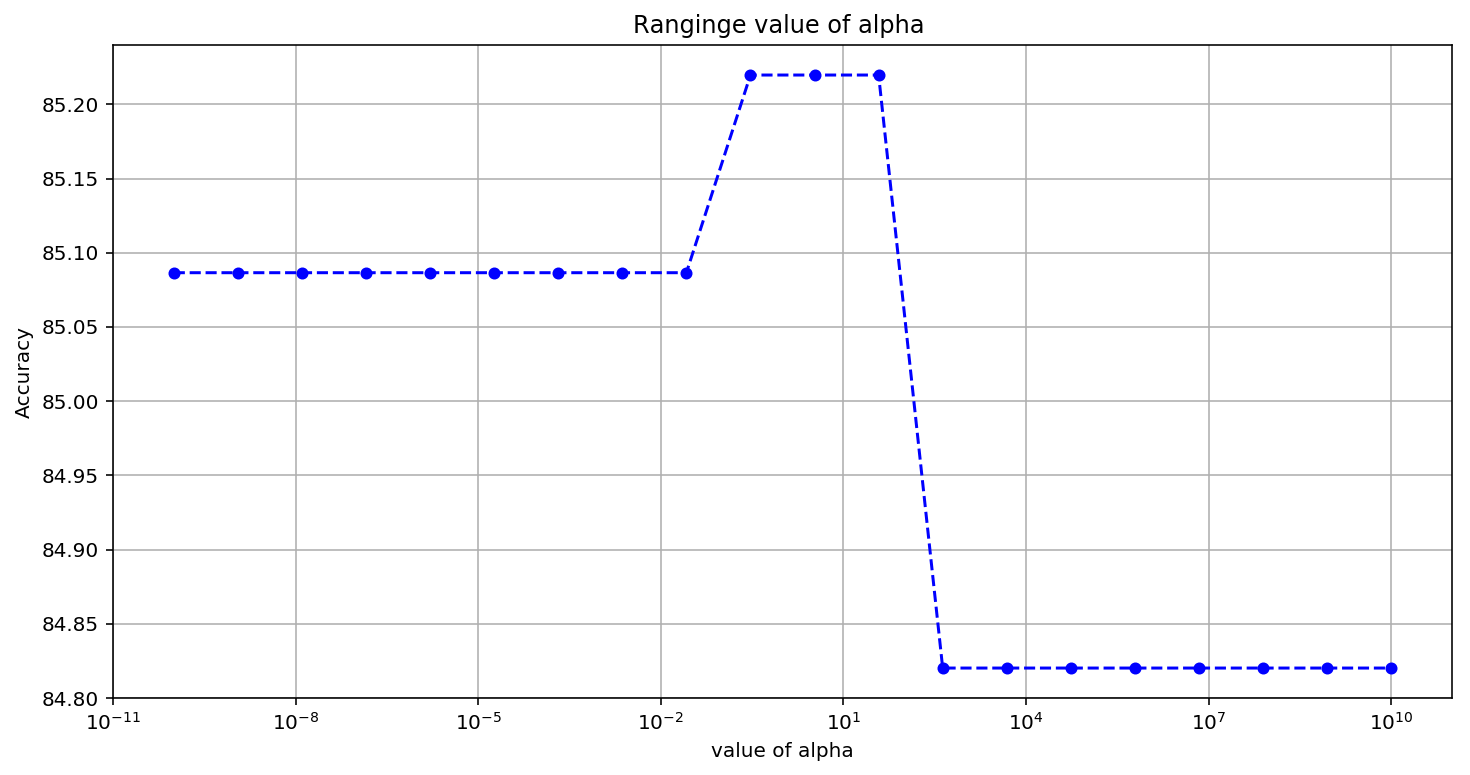

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(alphas, acc6, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=5)
plt.title('Ranginge value of alpha ')
plt.grid()
plt.xlabel('value of alpha')
plt.ylabel('Accuracy')
plt.xscale('log')

In [48]:
MLP

MLPClassifier(activation='identity', alpha=10000000000.0, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

# Comparison between solvers: ie gradient descent or not

In [58]:
dataset_t = pp.chose_features(dataset, n_features=12) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
dataset_t = pp.scale_data(dataset_t, 'standard', v=1)
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset

solvers = ['lbfgs', 'sgd', 'adam']

acc7=[]
for i in solvers:
    MLP= Multilayer(X_train, X_test, y_train, y_test,  hidden_layer_sizes=(100,), activation='identity', solver=i, alpha=0.05 )      
    y_pred = MLP.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc7.append(accuracy*100)


print(acc7)

Scaling data....
	 * Using standard scaling
[85.086551264980031, 85.619174434087881, 84.953395472703065]


Can see that most accurate is for the sgd solver at 85.6%

# Comparison between activations: identity, logistic, tanh or relu

In [64]:
dataset_t = pp.chose_features(dataset, n_features=12) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
dataset_t = pp.scale_data(dataset_t, 'standard', v=1)
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset

activations = ['identity', 'logistic', 'tanh', 'relu']

acc8=[]
for i in activations:
    MLP= Multilayer(X_train, X_test, y_train, y_test,  hidden_layer_sizes=(100,), activation= i, solver='sgd', alpha=0.05)      
    y_pred = MLP.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc8.append(accuracy*100)


print(acc8)

Scaling data....
	 * Using standard scaling
[85.619174434087881, 84.820239680426099, 84.953395472703065, 84.953395472703065]


Identity results in greatest accuracy 

Can be concluded that: alpha = 0.05, scaled data with 12 features and with (100,) hidden layer size results in the most accurate model.


# resampling data using optimised model 

In [96]:
dataset_t = pp.chose_features(dataset, n_features=12) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
dataset_t = pp.upsample(dataset_t) #upsample data 
dataset_t = pp.scale_data(dataset_t, 'standard', v=1)
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset

MLP= Multilayer(X_train, X_test, y_train, y_test,  hidden_layer_sizes=(100,), activation= 'identity', solver='sgd', alpha=0.05)      
y_pred = MLP.predict(X_test)
accuracy_upsampled = accuracy_score(y_test, y_pred)

print(accuracy_upsampled*100)


print(classification_report(y_test,y_pred))



Scaling data....
	 * Using standard scaling
66.7452830189
             precision    recall  f1-score   support

          0       0.67      0.68      0.67       643
          1       0.67      0.65      0.66       629

avg / total       0.67      0.67      0.67      1272



In [94]:


dataset_t = pp.chose_features(dataset, n_features=12) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
dataset_t = pp.downsample(dataset_t) #downsample data 
dataset_t = pp.scale_data(dataset_t, 'standard', v=1)
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset

MLP= Multilayer(X_train, X_test, y_train, y_test,  hidden_layer_sizes=(100,), activation= 'identity', solver='sgd', alpha=0.05)      
y_pred = MLP.predict(X_test)
accuracy_downsampled = accuracy_score(y_test, y_pred)

print(accuracy_downsampled*100)


print(classification_report(y_test,y_pred))



Scaling data....
	 * Using standard scaling
67.8260869565
             precision    recall  f1-score   support

          0       0.57      0.77      0.66        92
          1       0.80      0.62      0.70       138

avg / total       0.71      0.68      0.68       230



In [95]:
dataset_t = pp.chose_features(dataset, n_features=12) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
dataset_t = pp.scale_data(dataset_t, 'standard', v=1)
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset

MLP= Multilayer(X_train, X_test, y_train, y_test,  hidden_layer_sizes=(100,), activation= 'identity', solver='sgd', alpha=0.05)      
y_pred = MLP.predict(X_test)
accuracy_unsampled = accuracy_score(y_test, y_pred)

print(accuracy_unsampled*100)

print(classification_report(y_test,y_pred))






Scaling data....
	 * Using standard scaling
85.6191744341
             precision    recall  f1-score   support

          0       0.86      1.00      0.92       637
          1       1.00      0.05      0.10       114

avg / total       0.88      0.86      0.80       751



<Figure size 1440x864 with 0 Axes>

Text(0.5,1,'Upsampled data ')

Text(0.5,1,'Downsampled data ')

Text(0.5,1,'Unsampled data ')

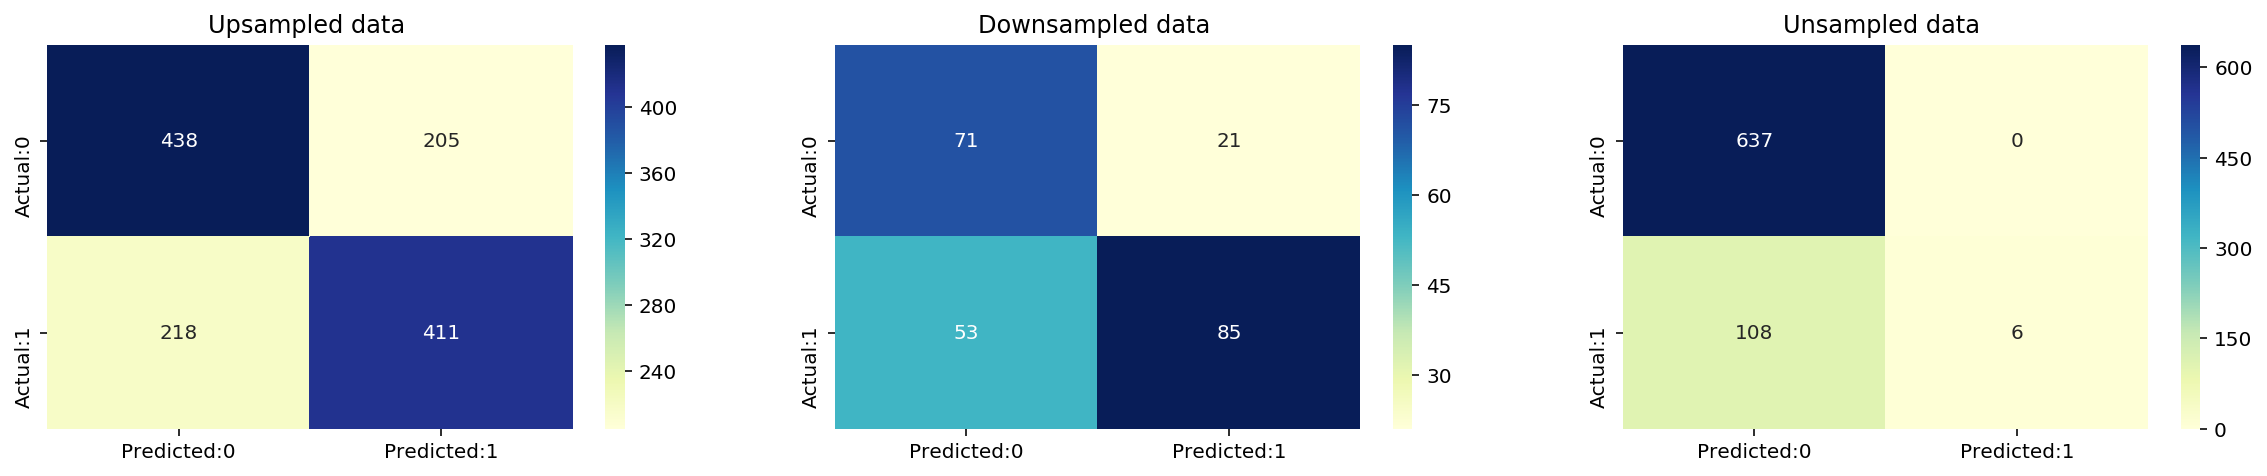

In [93]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sn.heatmap(conf_matrix_upsampled, annot=True,fmt='d',cmap="YlGnBu")
plt.title('Upsampled data ')

plt.subplot(3,3,2)
sn.heatmap(conf_matrix_downsampled, annot=True,fmt='d',cmap="YlGnBu")
plt.title('Downsampled data ')

plt.subplot(3,3,3)
sn.heatmap(conf_matrix_unsampled, annot=True,fmt='d',cmap="YlGnBu")
plt.title('Unsampled data ')


# Ranging random states to see effect on accuracy 

In [105]:
def cross_val(model, X, Y, scoring = ['accuracy','precision','recall','f1'], cv=5):
    
   #See https://scikit-learn.org/stable/modules/model_evaluation.html for list of allowed scoring params 
    from sklearn.model_selection import cross_val_score 
    
    print('\nCrossvalidation score for {} splits:\n'.format(cv))   
    
    cv_results = pd.DataFrame(columns=scoring)
    for measure in scoring:
        cv_results[measure] = cross_val_score(model, X, Y, scoring = measure, cv=cv)
    
    #print("Cross validation Accuracy:\n", cv_results.mean(),"\nCross validation STDEV:\n" , cv_results.std())
    return cv_results.mean()

def performance(model,X_test,y_test,cutoff=0.5,v=0,output='Accuracy'):
    from sklearn.preprocessing import binarize
    from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

    if model == 'fram': # cheap and dirty fix for framingham data needing different processing
        y_pred = X_test > cutoff*100 
    else:
        y_pred = model.predict_proba(X_test)
        y_pred = binarize(y_pred,cutoff)[:,1]
    
    if v == 1: 
        print('\n========\nCuttoff: ',cutoff)
        print('Confusion Matrix:')
        cm=confusion_matrix(y_test,y_pred)
        conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
        print(confusion_matrix(y_test,y_pred))
    
        print('Accuracy: {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))
        print('f1 score: {:.2f}%'.format(f1_score(y_test,y_pred)*100))
        print('precision score: {:.2f}%'.format(precision_score(y_test,y_pred)*100))
        print('recall score: {:.2f}%'.format(recall_score(y_test,y_pred)*100))
        
        print(classification_report(y_test,y_pred))
    

    if output == 'Accuracy':
         return accuracy_score(y_test,y_pred)
    elif output == 'Precision':
         return precision_score(y_test,y_pred)
    elif output == 'Recall':
         return recall_score(y_test,y_pred)
    elif output == 'f1_score':
         return f1_score(y_test,y_pred)
    elif output == 'All':
        a = [accuracy_score(y_test,y_pred), precision_score(y_test,y_pred),
                      recall_score(y_test,y_pred), f1_score(y_test,y_pred)]
        return a



    
# measure = cross_val(k_neighbors(X_train, X_test, y_train, y_test), X_train, y_train,scoring=['accuracy'])

# measure
#where model_name is replaced by whatever you have defined the model fit as 
#For example in the K-neighbors section I have defined the model_name as KN. (see k_neighbors function)

In [122]:
dataset_t = pp.chose_features(dataset, n_features=12) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
dataset_t = pp.scale_data(dataset_t, 'standard', v=1)
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split datasetresults = pd.DataFrame(results, columns=['accuarcy', 'precision', 'recall', 'f1'])
states = range(0,20)

results_MLP=[]
for i in states: 
    MLP= Multilayer(X_train, X_test, y_train, y_test,  hidden_layer_sizes=(100,), activation= 'identity', solver='sgd', alpha=0.05, random_state=i)      
    y_pred = MLP.predict(X_test)
    results_MLP.append(performance(MLP, X_test, y_test, output ='All'))
    
                   
results_MLP = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'f1_score'] )



Scaling data....
	 * Using standard scaling


/Users/eleanorbarr/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:358: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "
/Users/eleanorbarr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/eleanorbarr/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


<Figure size 864x432 with 0 Axes>


 MLP summary:


Text(0.5,1,'Ranging values of random state and the effect on model')

Text(0.5,0,'Random state')

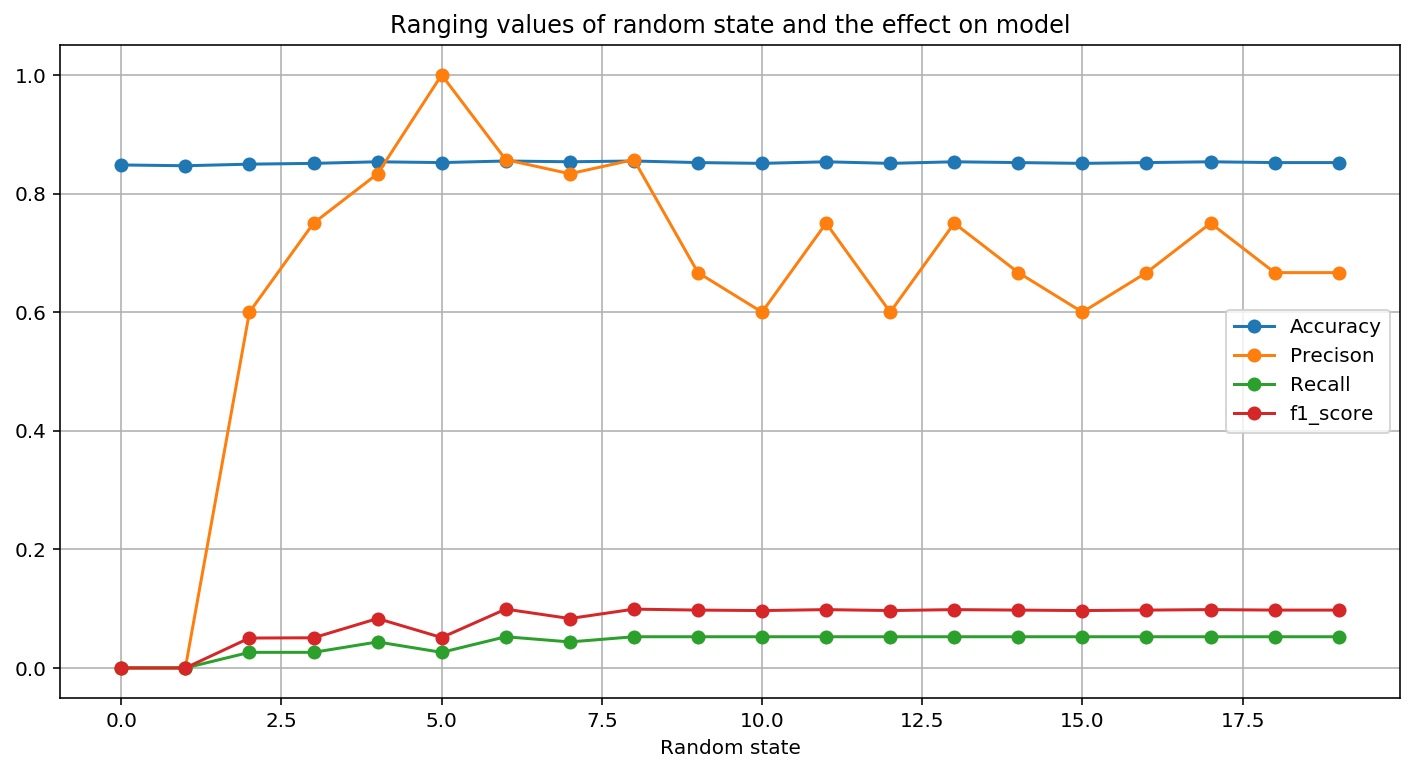

In [130]:
plt.figure(figsize=(12,6))

print('\n MLP summary:')
plt.plot(range(0,20), results_MLP['Accuracy'], label=metric, marker='o')
plt.plot(range(0,20), results_MLP['Precision'], label=metric, marker='o')
plt.plot(range(0,20), results_MLP['Recall'], label=metric, marker='o')
plt.plot(range(0,20), results_MLP['f1_score'], label=metric, marker='o')

plt.grid()
plt.title('Ranging values of random state and the effect on model')
plt.xlabel('Random state')
plt.legend(['Accuracy', 'Precison', 'Recall', 'f1_score'])